<a href="https://colab.research.google.com/github/Praveena1809/Portfolio/blob/master/CKD_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from lib.utils import *
from pandas_summary import DataFrameSummary
from sklearn import metrics as met

In [ ]:
np.random.seed(42)
np.set_printoptions(suppress=True)
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 20
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('input/raw/data.csv') # Reading the Dataset

# Exploratory Data Analysis (EDA)

In [ ]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.20,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.80,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.80,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.80,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.40,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,25.0,1.10,142.0,3.2,12.2,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.0,54.0,24.00,104.0,4.0,12.4,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,31.0,1.10,NaN,NaN,12.4,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,60.0,1.90,NaN,NaN,10.8,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,107.0,7.20,114.0,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
id                400 non-null int64
age               391 non-null float64
bp                388 non-null float64
sg                353 non-null float64
al                354 non-null float64
su                351 non-null float64
rbc               248 non-null object
pc                335 non-null object
pcc               396 non-null object
ba                396 non-null object
bgr               356 non-null float64
bu                381 non-null float64
sc                383 non-null float64
sod               313 non-null float64
pot               312 non-null float64
hemo              348 non-null float64
pcv               330 non-null object
wc                295 non-null object
rc                270 non-null object
htn               398 non-null object
dm                398 non-null object
cad               398 non-null object
appet             399 non-null object
pe         

In [ ]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [ ]:
df.rename(columns={'classification' : 'class'}, inplace=True)

In [ ]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, stratify=y, random_state=42)

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((300, 35), (300,), (100, 35), (100,))

In [ ]:
x_train.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,age_na,bp_na,bgr_na,bu_na,sc_na,sod_na,pot_na,hemo_na,pcv_na,wc_na,rc_na
67,0.488636,0.230769,0.8,0.666667,0.166667,1.0,0.5,0.5,0.5,0.861111,0.103979,0.011905,0.842271,0.042697,0.649660,0.688889,0.239669,0.457627,0.5,0.5,0.5,0.5,0.5,0.5,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
180,0.806818,0.307692,0.4,0.333333,0.833333,0.5,0.5,1.0,0.5,0.452991,0.139923,0.019841,0.842271,0.042697,0.489796,0.422222,0.239669,0.457627,0.5,1.0,0.5,1.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
234,0.397727,0.384615,0.4,0.166667,0.166667,0.5,1.0,0.5,0.5,0.211538,0.044929,0.011905,0.842271,0.042697,0.809524,0.777778,0.078512,0.525424,1.0,0.5,0.5,1.0,0.5,0.5,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
243,0.681818,0.307692,0.8,0.500000,0.333333,0.0,1.0,0.5,0.5,0.314103,0.119384,0.026455,0.842271,0.008989,0.700680,0.844444,0.363636,0.677966,1.0,0.5,0.5,1.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
147,0.659091,0.076923,0.4,0.666667,0.333333,1.0,0.5,1.0,0.5,0.568376,0.088575,0.017196,0.791798,0.011236,0.326531,0.355556,0.537190,0.152542,1.0,0.5,0.5,0.5,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
x_test.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,age_na,bp_na,bgr_na,bu_na,sc_na,sod_na,pot_na,hemo_na,pcv_na,wc_na,rc_na
70,0.670455,0.230769,0.6,0.166667,0.833333,0.0,1.0,0.5,0.5,0.722222,0.044929,0.003968,0.835962,0.042697,0.823129,0.777778,0.252066,0.525424,1.0,1.0,0.5,1.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38,0.761364,0.230769,0.8,0.666667,0.166667,0.5,1.0,0.5,0.5,0.211538,0.260591,0.048942,0.804416,0.076404,0.639456,0.688889,0.239669,0.457627,1.0,0.5,0.5,1.0,0.5,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
27,0.761364,0.153846,0.4,0.666667,0.833333,1.0,0.5,0.5,0.5,0.517094,0.219512,0.030423,0.791798,0.033708,0.639456,0.622222,0.305785,0.338983,1.0,1.0,1.0,1.0,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
395,0.602273,0.230769,0.8,0.166667,0.166667,1.0,1.0,0.5,0.5,0.252137,0.121951,0.001323,0.917981,0.053933,0.857143,0.844444,0.185950,0.474576,0.5,0.5,0.5,1.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85,0.772727,0.153846,0.6,0.500000,0.000000,0.0,0.0,0.5,0.5,0.211538,0.114249,0.014550,0.842271,0.042697,0.462585,0.688889,0.239669,0.457627,0.5,1.0,0.5,0.5,1.0,0.5,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [ ]:
y_train

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0], d

In [ ]:
y_test

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1], dtype=int8)

In [ ]:
x_train.drop(x_train.iloc[:,24:], axis=1, inplace=True)
x_test.drop(x_test.iloc[:,24:], axis=1, inplace=True)

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((300, 24), (300,), (100, 24), (100,))

In [ ]:
x_train.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
67,0.488636,0.230769,0.8,0.666667,0.166667,1.0,0.5,0.5,0.5,0.861111,0.103979,0.011905,0.842271,0.042697,0.649660,0.688889,0.239669,0.457627,0.5,0.5,0.5,0.5,0.5,0.5
180,0.806818,0.307692,0.4,0.333333,0.833333,0.5,0.5,1.0,0.5,0.452991,0.139923,0.019841,0.842271,0.042697,0.489796,0.422222,0.239669,0.457627,0.5,1.0,0.5,1.0,0.5,0.5
234,0.397727,0.384615,0.4,0.166667,0.166667,0.5,1.0,0.5,0.5,0.211538,0.044929,0.011905,0.842271,0.042697,0.809524,0.777778,0.078512,0.525424,1.0,0.5,0.5,1.0,0.5,0.5
243,0.681818,0.307692,0.8,0.500000,0.333333,0.0,1.0,0.5,0.5,0.314103,0.119384,0.026455,0.842271,0.008989,0.700680,0.844444,0.363636,0.677966,1.0,0.5,0.5,1.0,0.5,0.5
147,0.659091,0.076923,0.4,0.666667,0.333333,1.0,0.5,1.0,0.5,0.568376,0.088575,0.017196,0.791798,0.011236,0.326531,0.355556,0.537190,0.152542,1.0,0.5,0.5,0.5,0.5,1.0


In [ ]:
x_test.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
70,0.670455,0.230769,0.6,0.166667,0.833333,0.0,1.0,0.5,0.5,0.722222,0.044929,0.003968,0.835962,0.042697,0.823129,0.777778,0.252066,0.525424,1.0,1.0,0.5,1.0,0.5,0.5
38,0.761364,0.230769,0.8,0.666667,0.166667,0.5,1.0,0.5,0.5,0.211538,0.260591,0.048942,0.804416,0.076404,0.639456,0.688889,0.239669,0.457627,1.0,0.5,0.5,1.0,0.5,0.5
27,0.761364,0.153846,0.4,0.666667,0.833333,1.0,0.5,0.5,0.5,0.517094,0.219512,0.030423,0.791798,0.033708,0.639456,0.622222,0.305785,0.338983,1.0,1.0,1.0,1.0,1.0,0.5
395,0.602273,0.230769,0.8,0.166667,0.166667,1.0,1.0,0.5,0.5,0.252137,0.121951,0.001323,0.917981,0.053933,0.857143,0.844444,0.185950,0.474576,0.5,0.5,0.5,1.0,0.5,0.5
85,0.772727,0.153846,0.6,0.500000,0.000000,0.0,0.0,0.5,0.5,0.211538,0.114249,0.014550,0.842271,0.042697,0.462585,0.688889,0.239669,0.457627,0.5,1.0,0.5,0.5,1.0,0.5


# Model(s) Building / Training and Testing (With Cross Validation)

In [ ]:
scores = []
models = []

In [ ]:
#Utility function for plotting confusion matrix

def plot_cm(y_true, y_pred):
    cm = met.confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

# utility function to print cross k-fold cross validation scores, their mean and variance(standard deviation)
def print_scores(model, x_train, y_train, cv, scoring):
    print('Cross validation scores:', cross_val_score(model, x_train.values, y_train, cv=cv, scoring=scoring, n_jobs=-1) )
    print( 'Mean of scores:', np.mean( cross_val_score(model, x_train.values, y_train, cv=cv, scoring=scoring, n_jobs=-1) ) )
    print( 'Variance:', np.std( cross_val_score(model, x_train.values, y_train, cv=cv, scoring=scoring, n_jobs=-1) ) )
    

## Support Vector Classifier

In [ ]:
from sklearn.svm import SVC
svc = SVC(random_state=42)

In [ ]:
print_scores(svc, x_train, y_train, 5, 'accuracy')

Cross validation scores: [0.98360656 0.93442623 0.95       0.96610169 0.98305085]
Mean of scores: 0.9634370658516256
Variance: 0.01908293703482212


In [ ]:
svc.fit(x_train.values, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=42,
  shrinking=True, tol=0.001, verbose=False)

In [ ]:
svc_preds = svc.predict(x_test.values)

In [ ]:
svc_score = met.accuracy_score(y_test, svc_preds) * 100
scores.append(svc_score)
models.append('Support Vector Classifier')

Support Vector Classifier Accuracy =  96.0


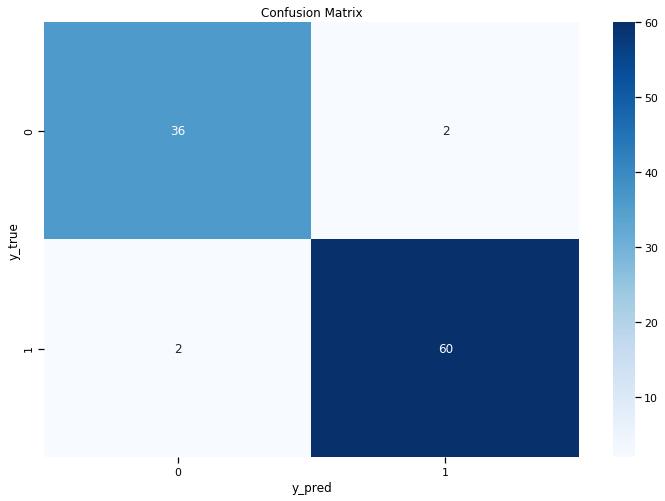

In [ ]:
print('Support Vector Classifier Accuracy = ', svc_score)
plot_cm(y_test, svc_preds)

## K-Nearest Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)

In [ ]:
print_scores(knn, x_train, y_train, 5, 'accuracy')

Cross validation scores: [0.96721311 0.98360656 0.95       1.         1.        ]
Mean of scores: 0.9801639344262295
Variance: 0.019372027864554046


In [ ]:
knn.fit(x_train.values, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
           weights='uniform')

In [ ]:
knn_preds = knn.predict(x_test.values)

In [ ]:
knn_score = met.accuracy_score(y_test, knn_preds) * 100
scores.append(knn_score)
models.append('K-Nearest Neighbors Classifier')

K-Nearest Neighbors Classifier Accuracy =  98.0


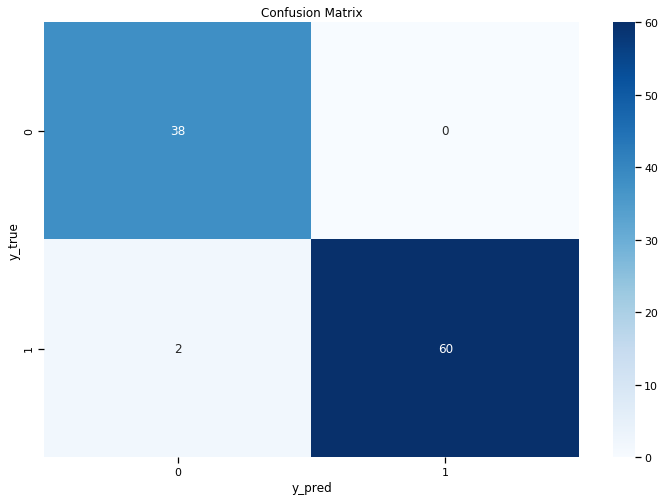

In [ ]:
print('K-Nearest Neighbors Classifier Accuracy = ', knn_score)
plot_cm(y_test, knn_preds)

## Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [ ]:
print_scores(gnb, x_train, y_train, 5, 'accuracy')

Cross validation scores: [0.96721311 0.91803279 0.88333333 0.93220339 0.91525424]
Mean of scores: 0.9232073724182644
Variance: 0.027193386602600383


In [ ]:
gnb.fit(x_train.values, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
gnb_preds = gnb.predict(x_test.values)

In [ ]:
gnb_score = met.accuracy_score(y_test, gnb_preds) * 100
scores.append(gnb_score)
models.append('Naive Bayes Classifier')

Naive Bayes Classifier Accuracy =  97.0


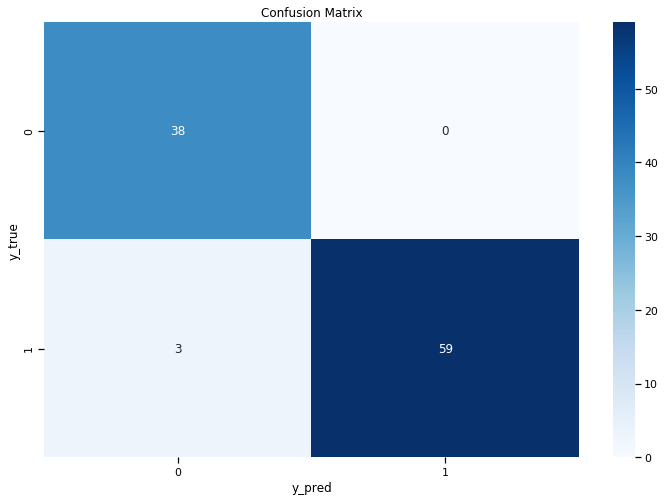

In [ ]:
print('Naive Bayes Classifier Accuracy = ', gnb_score)
plot_cm(y_test, gnb_preds)

## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

In [ ]:
print_scores(dt, x_train, y_train, 5, 'accuracy')

Cross validation scores: [0.96721311 0.93442623 1.         1.         0.93220339]
Mean of scores: 0.9667685468185606
Variance: 0.029831634780422805


In [ ]:
dt.fit(x_train.values, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [ ]:
dt_preds = dt.predict(x_test.values)

In [ ]:
dt_score = met.accuracy_score(y_test, dt_preds) * 100
scores.append(dt_score)
models.append('Decision Tree Classifier')

Decision Tree Classifier Accuracy =  97.0


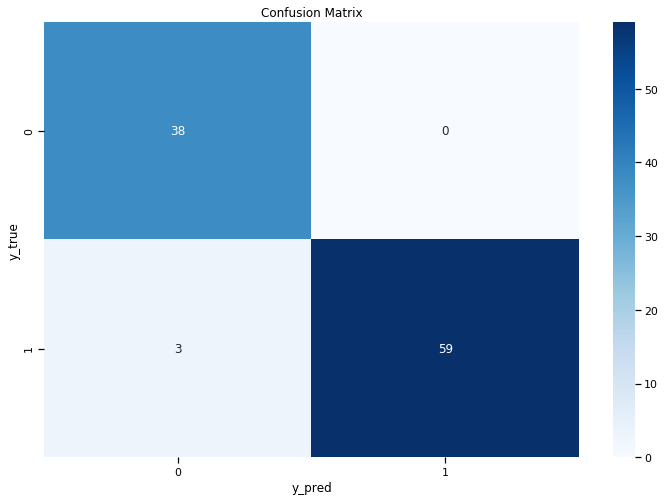

In [ ]:
print('Decision Tree Classifier Accuracy = ', dt_score)
plot_cm(y_test, dt_preds)

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [ ]:
print_scores(rf, x_train, y_train, 5, 'accuracy')

Cross validation scores: [1.         0.98360656 1.         1.         1.        ]
Mean of scores: 0.9967213114754099
Variance: 0.006557377049180336


In [ ]:
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [ ]:
rf_preds = rf.predict(x_test)

In [ ]:
rf_score = met.accuracy_score(y_test, rf_preds) * 100
scores.append(rf_score)
models.append('Random Forest Classifier')

Random Forest Classifier Accuracy =  100.0


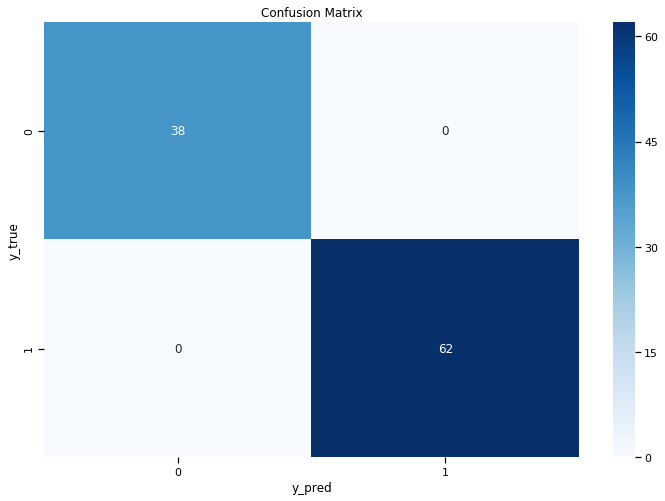

In [ ]:
print('Random Forest Classifier Accuracy = ', rf_score)
plot_cm(y_test, rf_preds)

# Accuracy Comparison of Models

In [ ]:
models

['Logistic Regression',
 'Support Vector Classifier',
 'K-Nearest Neighbors Classifier',
 'Naive Bayes Classifier',
 'SGD Classifier',
 'Decision Tree Classifier',
 'Random Forest Classifier',
 'Logistic Regression',
 'Support Vector Classifier',
 'K-Nearest Neighbors Classifier',
 'Naive Bayes Classifier',
 'SGD Classifier',
 'Decision Tree Classifier',
 'Random Forest Classifier']

In [ ]:
scores

[100.0,
 96.0,
 98.0,
 97.0,
 100.0,
 97.0,
 100.0,
 100.0,
 96.0,
 98.0,
 97.0,
 100.0,
 97.0,
 100.0]

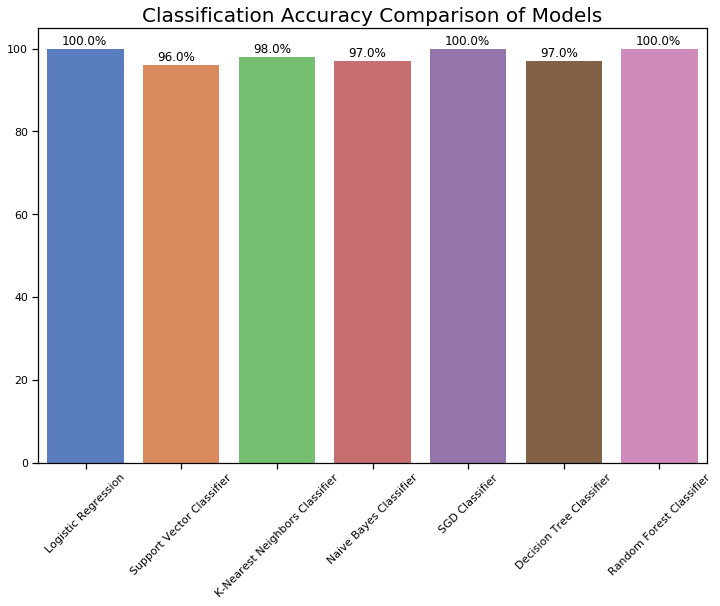

In [ ]:
ax = sns.barplot(x=models, y=scores)
ax.set_title('Classification Accuracy Comparison of Models', fontsize=20)
for item in ax.get_xticklabels():
    item.set_rotation(45)
for p in ax.patches:
        ax.annotate('{:}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))